In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Import data
df = pd.read_csv('medical_examination.csv', index_col = 'id')
df.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
# Add 'overweight' column
height_m = df['height'] / 100
bmi = df['weight'] / height_m ** 2
df['overweight'] = (bmi > 25).astype(int)
df.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


Normalize data by making 0 always good and 1 always bad.
If the value of 'cholesterol' or 'gluc' is 1, make the value 0.
If the value is more than 1, make the value 1.


In [4]:
cholesterol_normal = df['cholesterol'].copy()
cholesterol_normal[cholesterol_normal == 1] = 0
cholesterol_normal[cholesterol_normal > 1] = 1

In [5]:
gluc_normal = df['gluc'].copy()
gluc_normal[gluc_normal == 1] = 0
gluc_normal[gluc_normal > 1] = 1

In [6]:
df['cholesterol'] = cholesterol_normal
df['gluc'] = gluc_normal

# Draw Categorical Plot

In [7]:
df_cardio_0 = df[df['cardio'] == 0][['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']]
df_cardio_1 = df[df['cardio'] == 1][['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']]

In [8]:
df_cardio_0_vs = (df_cardio_0.count() - df_cardio_0.sum()).to_frame() #cantidad de zero's
df_cardio_0_vs[1] = df_cardio_0.sum() #cantidad de uno's
df_cardio_0_vs.index.name = 'variable'
df_cardio_0_vs = df_cardio_0_vs.reset_index()
df_cardio_0_vs = df_cardio_0_vs.melt(id_vars='variable', var_name='value', value_name='total')
df_cardio_0_vs['cardio'] = 0

In [9]:
df_cardio_1_vs = (df_cardio_1.count() - df_cardio_1.sum()).to_frame() #cantidad de zero's
df_cardio_1_vs[1] = df_cardio_1.sum() #cantidad de uno's
df_cardio_1_vs.index.name = 'variable'
df_cardio_1_vs = df_cardio_1_vs.reset_index()
df_cardio_1_vs = df_cardio_1_vs.melt(id_vars='variable', var_name='value', value_name='total')
df_cardio_1_vs['cardio'] = 1
df_cardio_1_vs.index += 12

In [10]:
df_cat = pd.concat([df_cardio_0_vs, df_cardio_1_vs])
df_cat

,variable,value,total,cardio
0,cholesterol,0,29330,0
1,gluc,0,30894,0
2,smoke,0,31781,0
3,alco,0,33080,0
4,active,0,6378,0
5,overweight,0,15915,0
6,cholesterol,1,5691,0
7,gluc,1,4127,0
8,smoke,1,3240,0
9,alco,1,1941,0


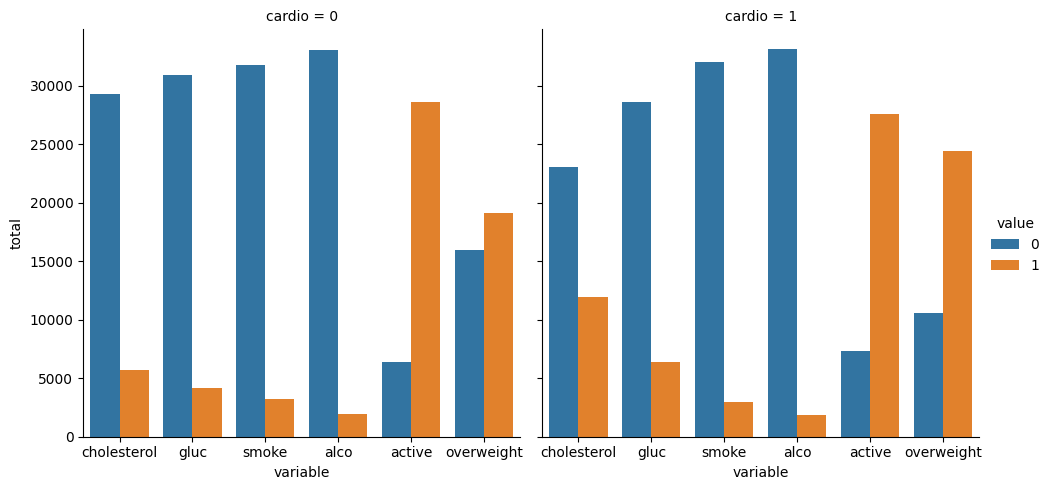

In [11]:
# Get the figure for the output
fig = sns.catplot(data = df_cat, kind="bar", x="variable", y = 'total', hue = 'value', col = 'cardio')

# Draw Heat Map  

In [12]:
# Clean the data
df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
             (df['height'] >= df['height'].quantile(0.025)) &
             (df['height'] <= df['height'].quantile(0.975)) &
             (df['weight'] >= df['weight'].quantile(0.025)) &
             (df['weight'] <= df['weight'].quantile(0.975))]

In [13]:
# Calculate the correlation matrix
corr = round(df_heat.corr(),1)

In [14]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr))

<AxesSubplot: >

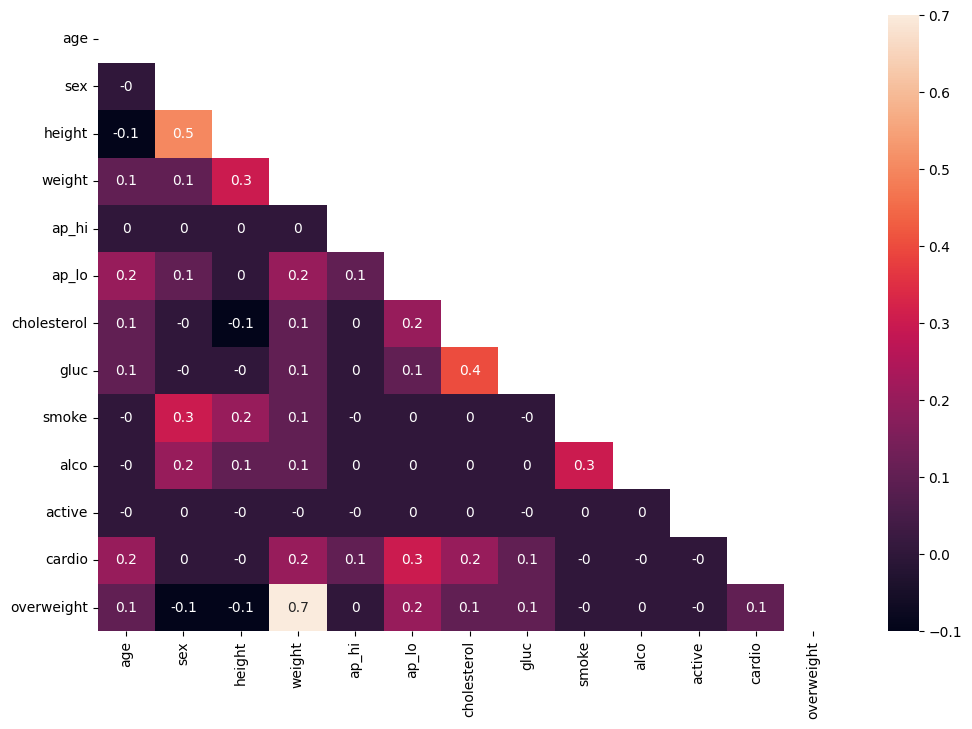

In [15]:
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 8))
# Draw the heatmap with 'sns.heatmap()'
sns.heatmap(corr, annot=True, mask=mask, ax=ax)